X.shape: (26, 2)


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


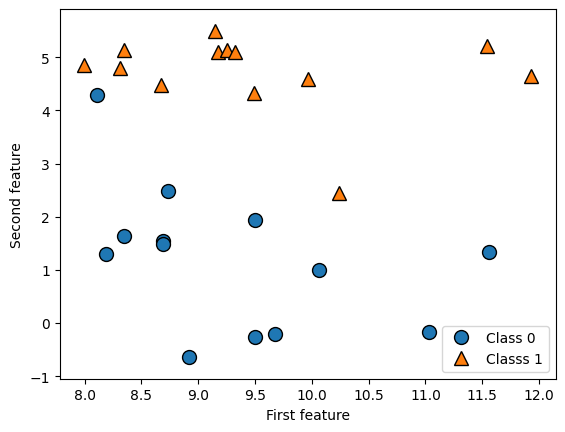

In [3]:
import mglearn
import matplotlib.pyplot as plt

# 生成数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', "Classs 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

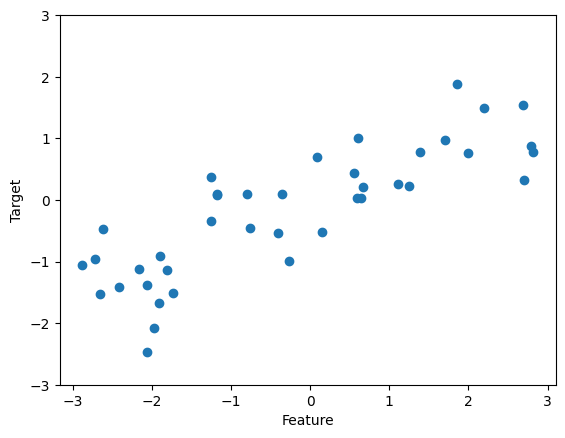

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
import numpy as np
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [7]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


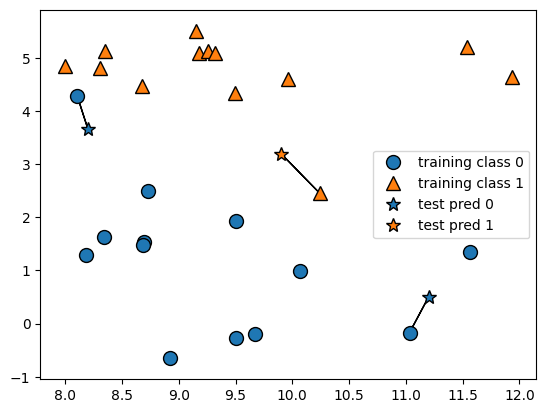

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


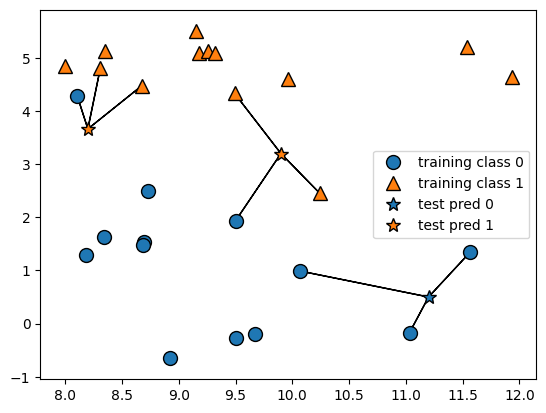

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [13]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


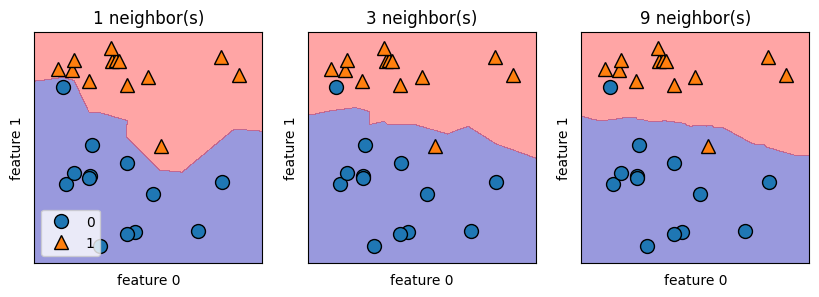

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

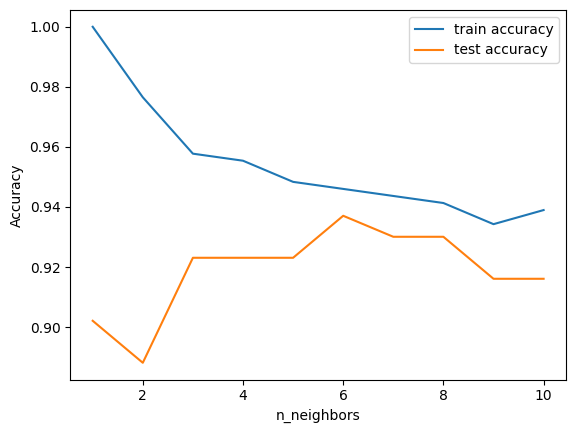

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)        
# 保持测试集与整个数据集里result的数据分类比例一致
training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录测试精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

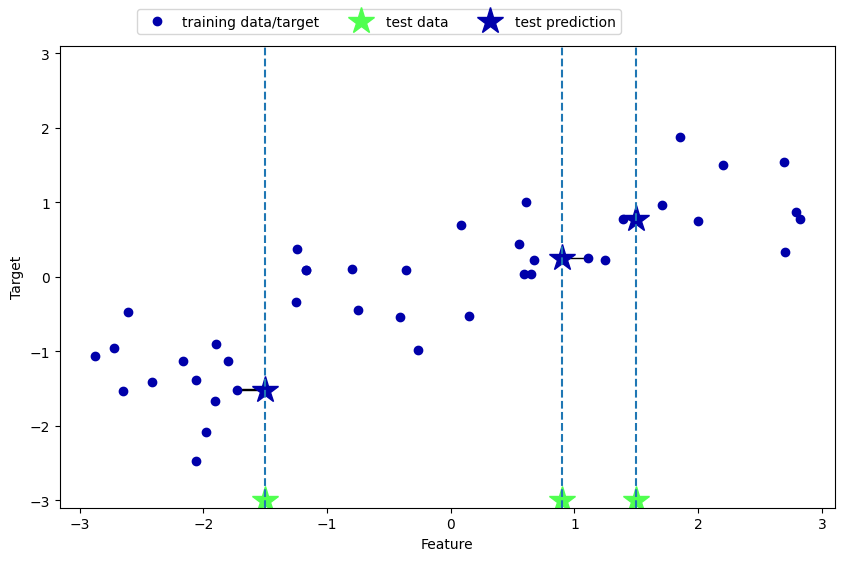

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print("Test set predictions: \n{}".format(reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [19]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


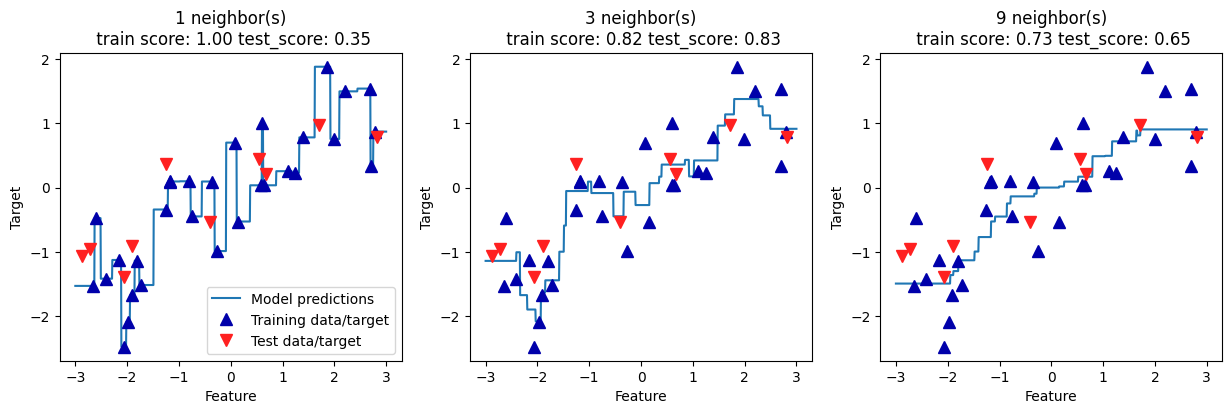

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 利用1个，3个，9个令居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test_score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

In [38]:
import numpy as np

def distance(X, b, p = 2):
        """
        计算距离
        参数
        ----------
        X : 特征矩阵
        b : 特征向量
        p : 距离范数，默认为 2，即欧式距离
        """
        return np.linalg.norm(X - b, ord = p, axis = 1)

In [39]:
class KdNode:
    """
    功能：k-d 树结点
    """
    def __init__(self, feature, value, index, left = None, right = None):
        self.feature = feature      # 结点对应特征的维度下标
        self.value = value          # 结点对应训练集的特征值；当结点为叶子结点时，为特征向量
        self.index = index          # 结点对应训练集的下标；当结点为叶子结点时，为下标向量
        self.left = left            # 左子树
        self.right = right          # 右子树

class KdTree:
    """
    功能：k-d 树算法实现
    参数
    ----------
    X : 特征矩阵
    leaf_size : 叶子节点包含的最大特征矩阵数量，默认为 10
    """
    def __init__(self, X, leaf_size = 10):
        def build_node(X, X_indexes, depth, leaf_size):
            """
            功能：构建结点
            参数
            ----------
            X : 特征矩阵
            X_indexes : 特征矩阵下标
            depth : 深度
            leaf_size : 叶子节点包含的最大特征矩阵数量
            """
            
            feature = np.mod(depth, X.shape[1])     # 当前特征的维度下标
            # 当前特征矩阵的大小小于等于指定的叶子结点包含的特征矩阵数量时构建叶子结点并返回
            if X.shape[0] <= leaf_size:
                return KdNode(feature, X, X_indexes)
            X_feature = X[:, feature]                   # 当前特征维度下的特征向量
            X_sort_indexes = np.argsort(X_feature)      # 按照当前特征维度排序后的下标向量
            X_sort = X[X_sort_indexes]                  # 按照当前特征维度排序后的特征矩阵
            median = X.shape[0] // 2                    # 中间下标
            X_left = X_sort[:median]                    # 左边的特征矩阵
            X_left_index = X_indexes[X_sort_indexes[:median]]                   # 左边的特征矩阵对应排序后的下标
            left = build_node(X_left, X_left_index, depth + 1, leaf_size)       # 递归的构建左子树
            X_right = X_sort[median + 1:]                                       # 右边的特征矩阵
            X_right_index = X_indexes[X_sort_indexes[median + 1:]]              # 右边的特征矩阵对应排序后的下标
            right = build_node(X_right, X_right_index, depth + 1, leaf_size)    # 递归的构建右子树
            return KdNode(feature, X_sort[median], X_indexes[X_sort_indexes[median]], left, right)      # 构建当前结点并返回
        self.root = build_node(X, np.array(range(X.shape[0])), 0, leaf_size)    # 根结点
        
    def query(self, X, k = 1, p = 2):
        """
        功能：查询距离最近 k 个特征向量
        参数
        ----------
        X : 特征矩阵
        k : 最近邻的数量，默认为 1
        p : 距离范数，默认为 2，即欧式距离
        """
        
        nearests = -np.ones((len(X), k), dtype = np.int8)       # 最近邻对应的下标向量
        distances = -np.ones((len(X), k))                       # 最近邻对应的距离向量
        return self.search(X, self.root, nearests, distances, p)
    
    def search(self, X, node, nearests, distances, p = 2):
        """
        搜索距离最近 k 个特征向量
        """
        
        # 当前结点不是叶子结点时
        if node.left is not None or node.right is not None:
            axis = X[:, node.feature] - node.value[node.feature]        # 当前特征下的特征值与切分值之差
            axis_left = axis < 0                                        # 切分点左边
            if (axis_left).any():
                # 递归的搜索左子树
                nearests[axis_left, :], distances[axis_left, :] = self.search(X[axis_left, :], node.left, nearests[axis_left, :], distances[axis_left, :], p)
            # 切分点右边
            axis_right = ~axis_left
            if (axis_right).any():
                # 递归的搜索右子树
                nearests[axis_right, :], distances[axis_right, :] = self.search(X[axis_right, :], node.right, nearests[axis_right, :], distances[axis_right, :], p)
            dist = distance(X, node.value, p)                       # 计算距离
            all_cond = np.zeros((X.shape[0],), dtype=np.bool)       # 是否所有特征点都处理过
            for i in range(nearests.shape[1]):          # 依次遍历 k 次
                # 当前记录的距离为-1或者新的距离小于当前记录的距离
                cond = (~all_cond) & ((distances[:, i] < 0) | (dist - distances[:, i] < 0))
                if (~cond).all():           # 没有满足条件的特征点就跳过
                    continue
                ns = np.insert(nearests[cond, :], i, node.index, axis=1)        # 插入最新的下标值
                nearests[cond, :] = ns[:,:-1]
                ds = np.insert(distances[cond, :], i, dist[cond], axis=1)       # 插入最新的距离
                distances[cond, :] = ds[:,:-1]
                all_cond = all_cond | cond              # 更新判断条件
                if all_cond.all():                      # 所有特征点都处理过则跳出
                    break
            # 距离记录中最大的距离大于切分轴（即另一边的子树可能包含更近的邻居）
            over = np.max(distances, axis=1) - np.abs(axis) > 0
            if over.any():
                over_left = over & axis_left        # 递归的搜索右子树
                if (over_left).any():
                    nearests[over_left, :], distances[over_left, :] = self.search(X[over_left, :], node.right, nearests[over_left, :], distances[over_left, :], p)
                over_right = over & axis_right      # 递归的搜索左子树
                if (over_right).any():
                    nearests[over_right, :], distances[over_right, :] = self.search(X[over_right, :], node.left, nearests[over_right, :], distances[over_right, :], p)
        else:
            for i in range(len(node.value)):                # 依次遍历当前叶子结点包含的特征向量
                dist = distance(X, node.value[i], p)        # 更新下标与距离记录的方式同上
                all_cond = np.zeros((X.shape[0],), dtype=np.bool)
                for j in range(nearests.shape[1]):
                    cond = (~all_cond) & ((distances[:, j] < 0) | (dist - distances[:, j] < 0))
                    if (~cond).all():
                        continue
                    ns = np.insert(nearests[cond, :], j, node.index[i], axis=1)
                    nearests[cond, :] = ns[:,:-1]
                    ds = np.insert(distances[cond, :], j, dist[cond], axis=1)
                    distances[cond, :] = ds[:,:-1]
                    all_cond = all_cond | cond
                    if all_cond.all():
                        break
        return nearests, distances

In [40]:
class BallNode:
    """
    ball 树结点
    """
    def __init__(self, value, index, radius, left = None, right = None):
        self.value = value      # 结点对应训练集的特征值；当结点为叶子结点时，为特征向量
        self.index = index      # 结点对应训练集的下标；当结点为叶子结点时，为下标向量
        self.radius = radius    # 超球体的半径
        self.left = left        # 左子树
        self.right = right      # 右子树

class BallTree:
    """
    ball 树算法实现
    参数
    ----------
    X : 特征矩阵
    leaf_size : 叶子节点包含的最大特征矩阵数量，默认为 10
    p : 距离范数，默认为 2，即欧式距离
    """
    
    def __init__(self, X, leaf_size = 10, p = 2):
        def build_node(X, X_indexes, leaf_size):
            """
            构建结点
            参数
            ----------
            X : 特征矩阵
            X_indexes : 特征矩阵下标
            leaf_size : 叶子节点包含的最大特征矩阵数量
            """
            
            # 当前特征矩阵的大小小于等于指定的叶子结点包含的特征矩阵数量时构建叶子结点并返回
            if X.shape[0] <= leaf_size:
                return BallNode(X, X_indexes, None)
            # 距离最宽的维度（标准差越大，代表该维度下样本点之间差距有大）
            feature = np.argmax(np.std(X, axis=0))
            X_feature_max = X[np.argmin(X[:, feature])]                 # 该维度下最大的样本点
            X_feature_min = X[np.argmax(X[:, feature])]                 # 该维度下最小的样本点
            X_feature_median = (X_feature_max + X_feature_min) / 2      # 中心点
            radius = np.max(distance(X, X_feature_median, p))           # 每个样本点与中心点之间的最大距离
            left_index = (distance(X, X_feature_max, p) - distance(X, X_feature_min, p)) < 0        # 将样本点分成两类
            if left_index.any():
                # 递归的构建左子树
                left = build_node(X[left_index, :], X_indexes[left_index], leaf_size)
            right_index = ~left_index
            if right_index.any():
                right = build_node(X[right_index, :], X_indexes[right_index], leaf_size)    # 递归的构建右子树
            
            return BallNode(X_feature_median, None, radius, left, right)        # 构建当前结点并返回
        
        self.root = build_node(X, np.array(range(X.shape[0])), leaf_size)   # 根结点
        
    def query(self, X, k = 1, p = 2):
        """
        查询距离最近 k 个特征向量

        参数
        ----------
        X : 特征矩阵
        k : 最近邻的数量，默认为 1
        p : 距离范数，默认为 2，即欧式距离
        """
        
        nearests = -np.ones((len(X), k), dtype = np.int8)       # 最近邻对应的下标向量
        distances = -np.ones((len(X), k))                       # 最近邻对应的距离向量
        return self.search(X, self.root, nearests, distances, p)
    
    def search(self, X, node, nearests, distances, p = 2):
        """
        搜索距离最近 k 个特征向量
        """
        
        if node.left is not None or node.right is not None:     # 当前结点不是叶子结点时
            max_distance = np.max(distances, axis=1)            # 最大的距离
            # 样本点与当前结点对应的超球面最近的距离大于当前的最大距离时，其子结点不可能存在跟近的距离，直接跳过
            over = ((distance(X, node.value, p) - node.radius - max_distance) >= 0) & (distances != -1).all()
            if over.all():
                return nearests, distances
            unover = ~over
            # 递归搜索左子数
            nearests[unover, :], distances[unover, :] = self.search(X[unover, :], node.left, nearests[unover, :], distances[unover, :], p)
            # 递归搜索右子数
            nearests[unover, :], distances[unover, :] = self.search(X[unover, :], node.right, nearests[unover, :], distances[unover, :], p)
        else:
            # 依次遍历当前叶子结点包含的特征向量
            for i in range(len(node.value)):
                # 更新下标与距离记录的方式 k-d 树
                dist = distance(X, node.value[i], p)
                all_cond = np.zeros((X.shape[0],), dtype=np.bool)
                for j in range(nearests.shape[1]):
                    cond = (~all_cond) & ((distances[:, j] < 0) | (dist - distances[:, j] < 0))
                    if (~cond).all():
                        continue
                    ns = np.insert(nearests[cond, :], j, node.index[i], axis=1)
                    nearests[cond, :] = ns[:,:-1]
                    ds = np.insert(distances[cond, :], j, dist[cond], axis=1)
                    distances[cond, :] = ds[:,:-1]
                    all_cond = all_cond | cond
                    if all_cond.all():
                        break
        return nearests, distances

In [41]:
class KnnClf:
    """
    k近邻分类器（使用 k-d 树和 Ball 树实现）

    参数
    ----------
    k : 最近邻的数量，默认为 5
    leaf_size : 叶子节点包含的最大特征矩阵数量，默认为 10
    p : 距离范数，默认为 2，即欧式距离
    """
    
    def __init__(self, k = 5, leaf_size = 10, p = 2, tree = "kdtree"):
        self.k = k
        self.leaf_size = leaf_size
        self.p = p
        self.tree = tree
        
    def fit(self, X, y):
        """
        k近邻分类拟合
        参数
        ----------
        X : 特征矩阵
        y : 标签分类
        """
        if self.tree == "kdtree":
            self._tree = KdTree(X, leaf_size = self.leaf_size)
        else:
            self._tree = BallTree(X, leaf_size = self.leaf_size, p = self.p)
        self.y = np.array(y)
        self.y_classes = np.unique(y)
    
    def predict(self, X):
        """
        k近邻分类预测
        参数
        ----------
        X : 特征矩阵
        """
        nearests, distances = self._tree.query(X, k = self.k, p = self.p)
        predict_y = self.y[nearests]
        predict_y_count = np.zeros((len(predict_y), len(self.y_classes)), dtype=np.int8)
        for i, y_class in enumerate(self.y_classes):
            predict_y_count[:, i] = np.sum(predict_y == y_class, axis=1)
        return self.y_classes[np.argmax(predict_y_count, axis=1)]

In [42]:
class KnnReg:
    """
    k近邻回归器（使用 k-d 树和 Ball 树实现）
    参数
    ----------
    k : 最近邻的数量，默认为 5
    leaf_size : 叶子节点包含的最大特征矩阵数量，默认为 10
    p : 距离函数参数，默认为 2，即欧式距离
    """
    def __init__(self, k = 5, leaf_size = 10, p = 2, tree = "kdtree"):
        self.k = k
        self.leaf_size = leaf_size
        self.p = p
        self.tree = tree
        
    def fit(self, X, y):
        """
        k近邻回归拟合
        参数
        ----------
        X : 特征矩阵
        y : 标签分类
        """
        if self.tree == "kdtree":
            self._tree = KdTree(X, leaf_size = self.leaf_size)
        else:
            self._tree = BallTree(X, leaf_size = self.leaf_size, p = self.p)
        self.y = np.array(y)
    
    def predict(self, X):
        """
        k近邻回归预测
        参数
        ----------
        X : 特征矩阵
        """
        nearests, distances = self._tree.query(X, k = self.k, p = self.p)
        predict_y = self.y[nearests]
        return np.average(predict_y, axis=1)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KnnClf()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("Test accuracy {:.3f}".format(accuracy_score(y_test, y_predict)))     # Test accuracy 0.857

Test accuracy 0.857


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_84672\1258010727.py:106: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_cond = np.zeros((X.shape[0],), dtype=np.bool)
C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_84672\1258010727.py:81: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wan

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KnnClf(tree="balltree")
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("Test accuracy {}".format(accuracy_score(y_test, y_predict)))

Test accuracy 0.8571428571428571


c:\Users\CarpeDiem\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_84672\2348075839.py:90: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_cond = np.zeros((X.shape[0],), dtype=np.bool)


In [47]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KnnReg(k=3, tree="balltree")
reg.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Test set R^2: {:.2f}".format(r2_score(X_test, y_test)))      # Test set R^2: 0.54

Test set R^2: 0.54


C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_84672\2348075839.py:90: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_cond = np.zeros((X.shape[0],), dtype=np.bool)
